In [1]:
import os
import obspy
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
%run helperfunctions.ipynb
os.getcwd()

'/Users/albertkong/grillochallenge'

In [2]:
os.chdir('lse_challenge/data')

In [3]:
os.chdir('signal')
signals = []
signal_files = os.listdir()

In [4]:
trace = obspy.read(signal_files[0])

In [13]:
sr = trace[0].stats.sampling_rate

In [16]:
trace[0].stats.starttime + 5/sr

2019-12-02T22:20:09.752000Z

In [15]:
trace[0].stats.starttime

2019-12-02T22:20:09.592000Z

In [4]:
signal_files = random.sample(signal_files, 150)

In [3]:
# Signal List
os.chdir('signal')
signals = []
signal_files = os.listdir()
for sigfile in signal_files[0:10]: #Need to remove index for actual dataset
    tmp_trace = obspy.read(sigfile)
    tmp_trace = tmp_trace.normalize()
    cutlength = np.random.randint(900)
    trace_mat = [tmp_trace[0].data[cutlength:1000+cutlength], tmp_trace[1].data[cutlength:1000+cutlength], tmp_trace[2].data[cutlength:1000+cutlength]]
    mag = np.sqrt(trace_mat[0]**2 + trace_mat[1]**2 + trace_mat[2]**2)
    signals.append([trace_mat[0], trace_mat[1], trace_mat[2], mag, cutlength, 1])
    
    # Negative Transformations
    neg_mat = rot_xyz(trace_mat, 0, -np.pi, 0)
    signals.append([neg_mat[0], neg_mat[1], neg_mat[2], mag, cutlength, 1])
    
    # X, Y, and Z Rotations by Theta
    theta = np.random.uniform()*2*np.pi
    x_mat = rot_x(trace_mat, theta)
    signals.append([x_mat[0], x_mat[1], x_mat[2], mag, cutlength, 1])
    y_mat = rot_y(trace_mat, theta)
    signals.append([y_mat[0], y_mat[1], y_mat[2], mag, cutlength, 1])
    z_mat = rot_z(trace_mat, theta)
    signals.append([z_mat[0], z_mat[1], z_mat[2], mag, cutlength, 1])
    
    # General Rotation by alpha, beta, gamma
    alpha = np.random.uniform()*2*np.pi
    beta = np.random.uniform()*2*np.pi
    gamma = np.random.uniform()*2*np.pi
    rot_mat = rot_xyz(trace_mat, alpha, beta, gamma)
    signals.append([rot_mat[0], rot_mat[1], rot_mat[2], mag, cutlength, 1])
    

# Noise List
os.chdir('../noise')
noise_files = os.listdir()
for noisefile in noise_files[0:10]: #Need to remove index for actual dataset
    tmp_trace = obspy.read(noisefile)
    tmp_trace = tmp_trace.normalize()
    cutlength = np.random.randint(900)
    trace_mat = [tmp_trace[0].data[cutlength:1000+cutlength], tmp_trace[1].data[cutlength:1000+cutlength], tmp_trace[2].data[cutlength:1000+cutlength]]
    mag = np.sqrt(trace_mat[0]**2 + trace_mat[1]**2 + trace_mat[2]**2)
    signals.append([trace_mat[0], trace_mat[1], trace_mat[2], mag, cutlength, 0])
    
    # Negative Transformations
    neg_mat = rot_xyz(trace_mat, 0, -np.pi, 0)
    signals.append([neg_mat[0], neg_mat[1], neg_mat[2], mag, cutlength, 0])
    
    # X, Y, and Z Rotations by Theta
    theta = np.random.uniform()*2*np.pi
    x_mat = rot_x(trace_mat, theta)
    signals.append([x_mat[0], x_mat[1], x_mat[2], mag, cutlength, 0])
    y_mat = rot_y(trace_mat, theta)
    signals.append([y_mat[0], y_mat[1], y_mat[2], mag, cutlength, 0])
    z_mat = rot_z(trace_mat, theta)
    signals.append([z_mat[0], z_mat[1], z_mat[2], mag, cutlength, 0])
    
    # General Rotation by alpha, beta, gamma
    alpha = np.random.uniform()*2*np.pi
    beta = np.random.uniform()*2*np.pi
    gamma = np.random.uniform()*2*np.pi
    rot_mat = rot_xyz(trace_mat, alpha, beta, gamma)
    signals.append([rot_mat[0], rot_mat[1], rot_mat[2], mag, cutlength, 0])
    
os.chdir('../')
os.getcwd()

'/Users/albertkong/grillochallenge/lse_challenge/data'

In [4]:
sig_df = pd.DataFrame(signals, columns = ["tr_x", "tr_y", "tr_z", "magnitude", "cutlength", "signal"])
sig_df['p_arrival'] = 1000 - sig_df['cutlength']

In [5]:
sig_df.tail(10)

,tr_x,tr_y,tr_z,magnitude,cutlength,signal,p_arrival
110,"[0.133333333333, 0.133333333333, 0.06666666666...","[0.140584686735, 0.354404494972, 0.13260111610...","[0.129865695629, 0.0877567047588, 0.1697792250...","[0.23325293315, 0.388692118603, 0.225504957159...",387,0,613
111,"[-0.134319819862, -0.332412027396, -0.14687269...","[-0.100578841496, -0.0183505069995, -0.1412824...","[0.1620154729, 0.200616714158, 0.096540968668,...","[0.23325293315, 0.388692118603, 0.225504957159...",387,0,613
112,"[-0.0732196298779, 0.00749060225044, -0.125922...","[-0.15010918338, -0.134381582677, -0.092458599...","[0.162828282828, 0.364646464646, 0.16262626262...","[0.23325293315, 0.388692118603, 0.225504957159...",387,0,613
113,"[-0.122535461106, -0.0321810223754, -0.1445890...","[0.197315999323, 0.366900934301, 0.15262641417...","[-0.0214099978073, -0.124216139339, -0.0815577...","[0.23325293315, 0.388692118603, 0.225504957159...",387,0,613
114,"[-0.499860192003, -0.425184080529, -0.35050796...","[-0.0778595032513, 0.177571687453, -0.07841381...","[-0.338307182843, 0.0161633682883, -0.77205708...","[0.608583653871, 0.46105798008, 0.851514359348...",896,0,104
115,"[0.499860192003, 0.425184080529, 0.35050796905...","[-0.0778595032513, 0.177571687453, -0.07841381...","[0.338307182843, -0.0161633682883, 0.772057084...","[0.608583653871, 0.46105798008, 0.851514359348...",896,0,104
116,"[-0.499860192003, -0.425184080529, -0.35050796...","[0.0444109381157, -0.175140728404, 0.002555807...","[0.344298592483, -0.0334467324823, 0.776024700...","[0.608583653871, 0.46105798008, 0.851514359348...",896,0,104
117,"[0.530541046451, 0.421566872383, 0.42431112004...","[-0.0778595032513, 0.177571687453, -0.07841381...","[0.287816190552, -0.0576552592535, 0.734089947...","[0.608583653871, 0.46105798008, 0.851514359348...",896,0,104
118,"[0.489853331929, 0.440507928705, 0.34116242428...","[0.12635674495, -0.13515166025, 0.112306558291...","[-0.338307182843, 0.0161633682883, -0.77205708...","[0.608583653871, 0.46105798008, 0.851514359348...",896,0,104
119,"[0.143432066855, 0.172069942719, 0.35776045154...","[-0.24991704724, 0.168668894735, -0.6415809021...","[-0.536043632045, -0.393086758562, -0.43064847...","[0.608583653871, 0.46105798008, 0.851514359348...",896,0,104


In [12]:
ind = np.random.randint(119)
print(sig_df['cutlength'][ind],":",sig_df['signal'][ind])
#plot_sig(sig_df, ind)
slice_df = sig_df.head(1)

346 : 1


In [13]:
p_arrive = sig_df['p_arrival'][ind]

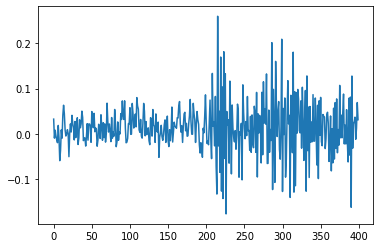

In [67]:
plt.plot(sig_df['tr_x'][ind][p_arrive-200:p_arrive+200])

In [9]:
print("STA:", np.var(sig_df['tr_x'][ind][p_arrive-12:p_arrive+13]))
print("LTA:", np.var(sig_df['tr_x'][ind][p_arrive-25:p_arrive+25]))

STA: 0.0298579815755
LTA: 0.020091131584


In [10]:
print("STA:", np.mean(sig_df['tr_x'][ind][p_arrive-12:p_arrive+13]))
print("LTA:", np.mean(sig_df['tr_x'][ind][p_arrive-25:p_arrive+25]))

STA: 0.0239542753534
LTA: 0.0101940903279


In [11]:
diff_arr_st = np.diff(sig_df['tr_x'][ind][p_arrive-12:p_arrive+13])
diff_arr_lt = np.diff(sig_df['tr_x'][ind][p_arrive-25:p_arrive+25])

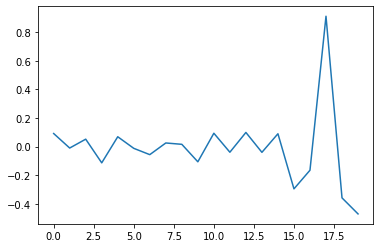

In [12]:
plt.plot(diff_arr_st)

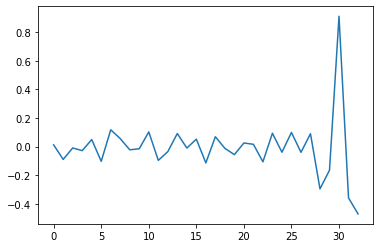

In [17]:
plt.plot(diff_arr_lt)

In [15]:
#sig_df['trmatrix_cut'][ind][0][p_arrive-50:p_arrive+50]

In [42]:
features = []
targets = []
x = slice_df["tr_x"]
y = slice_df["tr_y"]
z = slice_df["tr_z"]
mag = slice_df["magnitude"]
signal = slice_df["signal"]
p_arrival = slice_df["p_arrival"]
d = {"x": x, "y":y, "z":z, "magnitude":mag}

In [43]:
temp_df = pd.DataFrame(data = d)
features.append(temp_df.values)
targets.append(signal)

In [70]:
start_ind = 0
end_ind = 50

In [73]:
#temp_df["signal"]

In [17]:
start_ind = 0
end_ind = 50
while end_ind < 1000:
    
    xwindow = temp_df["x"][0][start_ind:end_ind]
    ywindow = temp_df["y"][0][start_ind:end_ind]
    zwindow = temp_df["z"][0][start_ind:end_ind]
    magwindow = temp_df["magnitude"][0][start_ind:end_ind]
    stawindow = temp_df["STA"][0][start_ind:end_ind]
    ltawindow = temp_df["LTA"][0][start_ind:end_ind]
    stvwindow = temp_df["STV"][0][start_ind:end_ind]
    ltvwindow = temp_df["LTV"][0][start_ind:end_ind]
    
    window_df = {"start_index": (start_ind + 49),"x": xwindow, "y":ywindow, "z":zwindow, "magnitude":magwindow,
                "STA": stawindow, "LTA": ltawindow, "STV": stvwindow, "LTV": ltvwindow}
    
    features.append(window_df.values)
    
    if (p_arrival >= start_ind) and (p_arrival <= end_ind):
        targets.append(1)
    else:
        targets.append(0)
    
    start_ind += 20
    end_ind = start_ind + 50
    